# Homework Python Programming for data analytics III
# Case Survivors of Titanic accident

    Name: Meizir
    NIK : 78082
    email: meizir@telkomsel.co.id

## Import modul

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)


## Import dataset

In [30]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Duplicate data

In [32]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

## Find Missing value

### Distribution of missing value

In [33]:
count_missing=data.isnull().sum()
count_missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop column mising value >60%

In [34]:
missing=count_missing[count_missing>891*0.6]
missing

Cabin    687
dtype: int64

In [35]:
#Drop Kabin Column
data=data.drop(['Cabin'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


###  Inputting Missing Value

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age')]

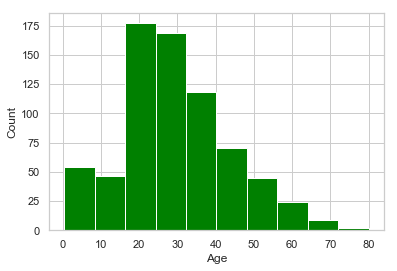

In [36]:
ax = data["Age"].hist(bins=10, color='green')
ax.set(xlabel='Age', ylabel='Count')

    - "Age" adalah positif skewed maka median akan digunakan untuk mengisi missing value
    - "Embarked" akan mengunakan mode()

In [37]:
median= data['Age'].median()
data['Age']=data['Age'].fillna(median)

mode= data['Embarked'].mode()
data['Embarked']=data['Embarked'].fillna(mode)

In [38]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


## Data analysis

### Exploration of Age

In [39]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

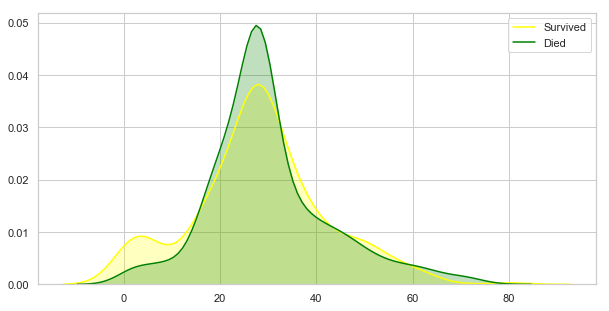

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['Age'][data.Survived ==1], color='yellow', shade=True)
sns.kdeplot(data['Age'][data.Survived ==0], color='green', shade=True)
plt.legend(['Survived', 'Died'])
plt.show()

the age distribution of survivors and deaths looks similar with range 20-40.

### Exploration of Gender

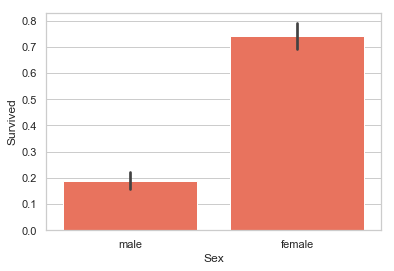

In [41]:
sns.barplot('Sex','Survived', data=data, color='tomato')
plt.show()

Women have the most likely survivors

### Exploration of Passenger Class

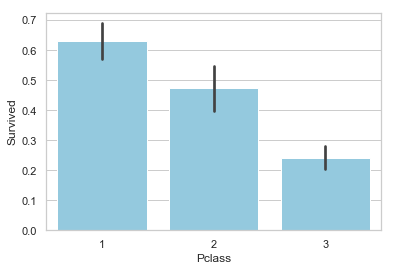

In [42]:
sns.barplot('Pclass','Survived', data=data, color='skyblue')
plt.show()

Class 1 has the most survivors

### Exploration of Embarked

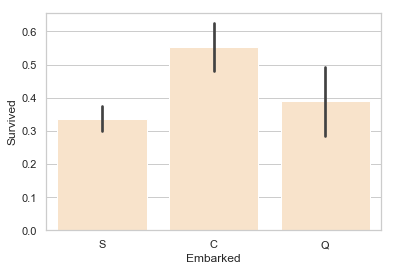

In [43]:
sns.barplot('Embarked','Survived', data=data, color='bisque')
plt.show()

Passengers from Cherbourg are more likely to survive

### Exploration of Gender and Class

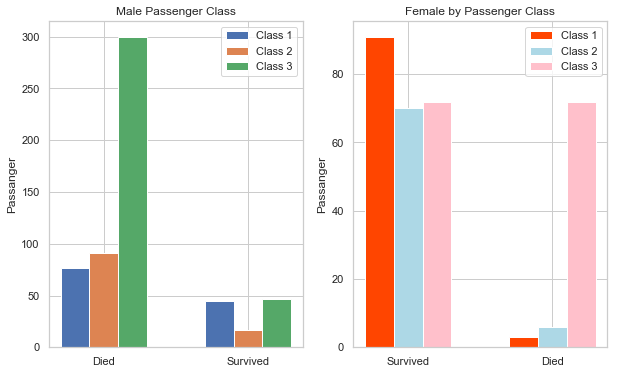

<Figure size 432x288 with 0 Axes>

In [44]:
x = np.arange(len(data_male['Survived'].value_counts())) 
x1 = np.arange(len(data_female['Survived'].value_counts()))
width = 0.2


#chart Sex 'male'
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10,6))
ax.bar(x - width, data_male.Survived[data_male.Pclass==1].value_counts(),width, label='Class 1')
ax.bar(x, data_male.Survived[data_male.Pclass==2].value_counts(), width, label='Class 2')
ax.bar(x + width, data_male.Survived[data_male.Pclass==3].value_counts(), width, label='Class 3')

ax.set_ylabel('Passanger')
ax.set_title('Male Passenger Class')
ax.set_xticks(x)
ax.set_xticklabels(["Died", "Survived"])
ax.legend()

#chart Sex 'Female'
ax1.bar(x1 - width, data_female.Survived[data_female.Pclass==1].value_counts(), width, label='Class 1',color='orangered')
ax1.bar(x1, data_female.Survived[data_female.Pclass==2].value_counts(), width, label='Class 2',color='lightblue')
ax1.bar(x1 + width, data_female.Survived[data_female.Pclass==3].value_counts(), width, label='Class 3', color='pink')

ax1.set_ylabel('Passanger')
ax1.set_title('Female by Passenger Class')
ax1.set_xticks(x1)
ax1.set_xticklabels(['Survived','Died'])
ax1.legend()


plt.show()
plt.savefig('Exploration of Gender and Class.png')

In [45]:
#memisahkan dataser 'male' dan 'female'
data_male=data[data.Sex =='male']
data_female=data[data.Sex =='female']

###  Exploration of Gender and Embarked

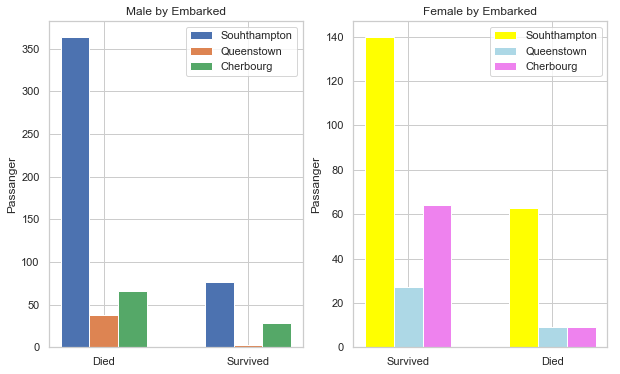

<Figure size 432x288 with 0 Axes>

In [46]:
x2 = np.arange(len(data_male['Survived'].value_counts())) 
x3 = np.arange(len(data_female['Survived'].value_counts()))
width = 0.2  

#chart Sex 'male'
fig, (ax2, ax3) = plt.subplots(1,2, figsize=(10,6))
ax2.bar(x - width, data_male.Survived[data_male.Embarked =='S'].value_counts(),width, label='Souhthampton')
ax2.bar(x, data_male.Survived[data_male.Embarked =='Q'].value_counts(), width, label='Queenstown')
ax2.bar(x + width, data_male.Survived[data_male.Embarked =='C'].value_counts(), width, label='Cherbourg')

ax2.set_ylabel('Passanger')
ax2.set_title('Male by Embarked')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Died', 'Survived'])
ax2.legend()

#chart Sex 'Female'
ax3.bar(x1 - width, data_female.Survived[data_female.Embarked =='S'].value_counts(), width, label='Souhthampton',color='yellow')
ax3.bar(x1, data_female.Survived[data_female.Embarked =='Q'].value_counts(), width, label='Queenstown',color='lightblue')
ax3.bar(x1 + width, data_female.Survived[data_female.Embarked =='C'].value_counts(), width, label='Cherbourg', color='violet')

ax3.set_ylabel('Passanger')
ax3.set_title('Female by Embarked')
ax3.set_xticks(x3)
ax3.set_xticklabels(['Survived','Died'])
ax3.legend()


plt.show()
plt.savefig('Exploration of Gender and Embarked.png')

##  Conclusion

1. Most of the survivors were women
2. Passenger Women in class 1 have the greatest possibility of survival
3. most of the survivors were from Southampton port
4. male passengers from southampton have little chance of survival